In [1]:
from google.colab import files

model_filenames = ['best_xgboost_model.pkl','decision_tree.pkl','naive_bayes.pkl','random_forest.pkl',
                   'voting_classifier_soft.pkl','knn.pkl','logistic_regression.pkl']

for filename in model_filenames:
  files.download(filename)


FileNotFoundError: Cannot find file: best_xgboost_model.pkl

In [ ]:
%%writefile streamlit_app.py

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('churn.csv')

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

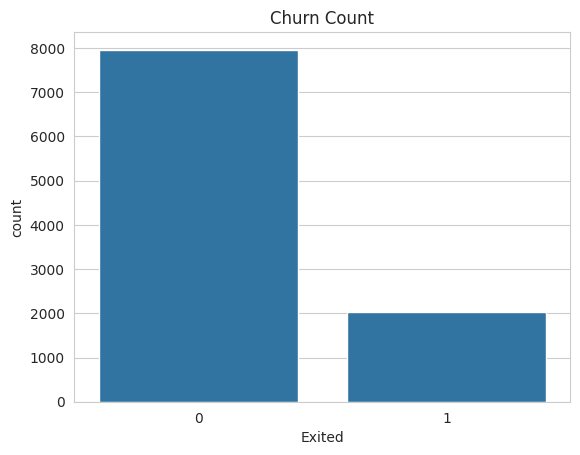

In [16]:
sns.countplot(x='Exited',data=df)
plt.title('Churn Count');


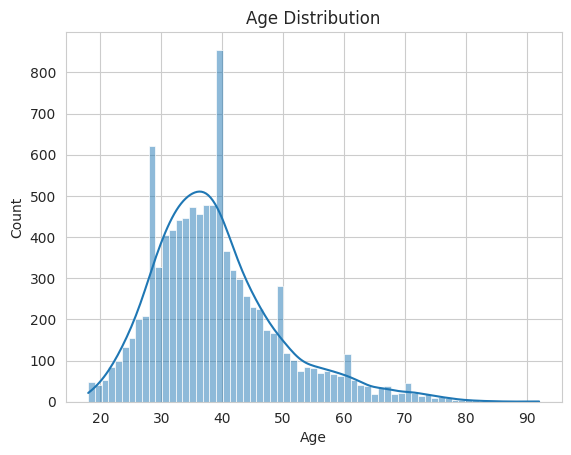

In [17]:
# prompt: sns.hisplot(data=df, x='Age', kde=True)

sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution');

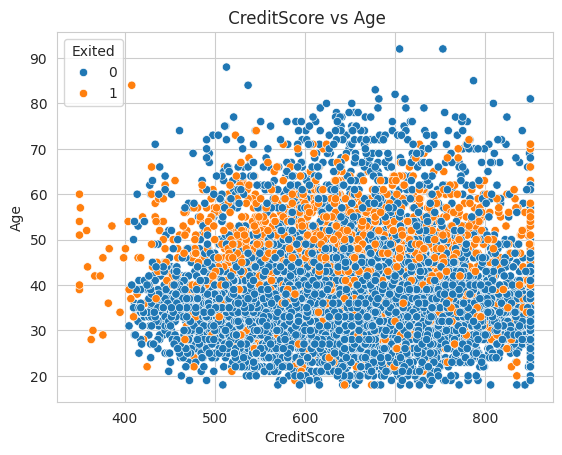

In [18]:
sns.scatterplot(x='CreditScore', y='Age', data=df, hue='Exited')
plt.title(' CreditScore vs Age');

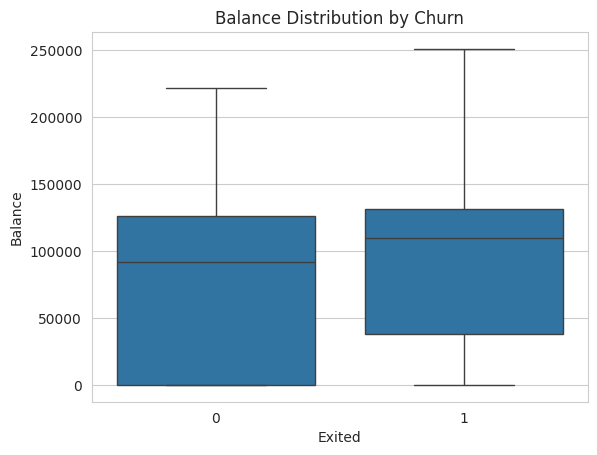

In [19]:
sns.boxplot(x='Exited', y="Balance", data=df)
plt.title('Balance Distribution by Churn');

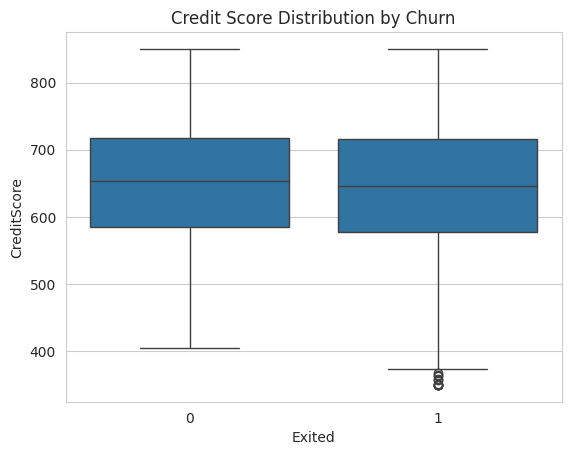

In [20]:
sns.boxplot(x='Exited', y="CreditScore", data=df)
plt.title('Credit Score Distribution by Churn');

In [21]:
features = df.drop('Exited', axis=1)

In [22]:
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [23]:
target = df['Exited']

In [24]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [25]:
features = features.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [26]:
features.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78


In [27]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [28]:
features = features.dropna()

In [29]:
features = pd.get_dummies(features, drop_first=False,)

In [30]:
features.shape

(10000, 13)

In [31]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import pickle

In [38]:
# prompt: function to evaluate and save the models add train data

def evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_filename):
  """
  Evaluates a given model, prints performance metrics, and saves the model.

  Args:
    model: The machine learning model to evaluate and save.
    X_train: Training data features.
    y_train: Training data target variable.
    X_test: Test data features.
    y_test: Test data target variable.
    model_filename: The filename to save the trained model as.
  """
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print('-------------------------------------------------')
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  # Save the trained model to a file
  with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
  print(f"Model saved as {model_filename}")
  print(' ')
  print(' ')



In [39]:
# prompt: initiate all models and run them with the function

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_model = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost_model = xgb.XGBClassifier()


# Run all models and evaluate them
models = [logistic_regression, decision_tree, random_forest, svm_model, knn, naive_bayes, xgboost_model]
model_filenames = ['logistic_regression.pkl', 'decision_tree.pkl', 'random_forest.pkl', 'svm_model.pkl', 'knn.pkl', 'naive_bayes.pkl', 'xgboost_model.pkl']


for model, model_filename in zip(models, model_filenames):
  evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_filename)

LogisticRegression Accuracy: 0.8110
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

[[1543   64]
 [ 314   79]]
Model saved as logistic_regression.pkl
 
 
DecisionTreeClassifier Accuracy: 0.7800
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.49      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000

[[1367  240]
 [ 200  193]]
Model saved as decision_tree.pkl
 
 
RandomForestClassifier Accuracy: 0.8

In [40]:
features_importances_xgb = xgboost_model.feature_importances_
features_names = features.columns

In [41]:
features_importances_df = pd.DataFrame({'Feature': features_names, 'Importance_XGB': features_importances_xgb})

In [42]:
features_importances_df.sort_values(by='Importance_XGB', ascending=False)

,Feature,Importance_XGB
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [44]:
# prompt: initiate all models and run them with the function

# Initialize the model
xgboost_model = xgb.XGBClassifier(random_state=42)


# Run model and evaluate
model = xgboost_model
model_filename ='xgboost_model.pkl'

evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_filename)

XGBClassifier Accuracy: 0.8625
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

[[1523   84]
 [ 191  202]]
Model saved as xgboost_model.pkl
 
 


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(random_state=42)


In [47]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
# prompt: initiate all models and run them with the function

# Initialize the models
logistic_regression = LogisticRegression(max_iter=100000000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
xgboost_model = xgb.XGBClassifier(random_state=42)


# Run all models and evaluate them
models = [logistic_regression, decision_tree, random_forest, svm_model, knn, naive_bayes, xgboost_model]
model_filenames = ['logistic_regression.pkl', 'decision_tree.pkl', 'random_forest.pkl', 'svm_model.pkl', 'knn.pkl', 'naive_bayes.pkl', 'xgboost_model.pkl']


for model, model_filename in zip(models, model_filenames):
  evaluate_and_save_model(model, X_train_resampled, y_train_resampled, X_test, y_test, model_filename)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7970
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1607
           1       0.48      0.41      0.44       393

    accuracy                           0.80      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.79      0.80      0.79      2000

[[1434  173]
 [ 233  160]]
Model saved as logistic_regression.pkl
 
 
DecisionTreeClassifier Accuracy: 0.7685
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1607
           1       0.43      0.55      0.48       393

    accuracy                           0.77      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.77      0.78      2000

[[1322  285]
 [ 178  215]]
Model saved as decision_tree.pkl
 
 
RandomForestClassifier Accuracy: 0.8

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
# Create the VotingClassifier with 'soft' voting
voting_classifier = VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)), ('xgb', xgb.XGBClassifier(random_state=42)), ('svm', SVC(probability=True))], voting='soft')
# Evaluate the VotingClassifier
evaluate_and_save_model(voting_classifier, X_train_resampled, y_train_resampled, X_test, y_test, 'voting_classifier_soft.pkl')

VotingClassifier Accuracy: 0.8540
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

[[1477  130]
 [ 162  231]]
Model saved as voting_classifier_soft.pkl
 
 


In [51]:
# Create the VotingClassifier with 'hard' voting
voting_classifier = VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)), ('xgb', xgb.XGBClassifier(random_state=42)), ('svm', SVC(probability=True))], voting='hard')
# Evaluate the VotingClassifier
evaluate_and_save_model(voting_classifier, X_train_resampled, y_train_resampled, X_test, y_test, 'voting_classifier_hard.pkl')

VotingClassifier Accuracy: 0.8450
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.85      2000

[[1445  162]
 [ 148  245]]
Model saved as voting_classifier_hard.pkl
 
 


In [52]:
# prompt: gridsearch for xgboost with recall score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object with recall as the scoring metric
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall score on test set:", recall)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best recall score: 0.8662693169841009
Recall score on test set: 0.5776081424936387


In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best XGBoost Accuracy on test set: {accuracy:.4f}")

# Save the best model
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
print("Best XGBoost model saved as xgboost_model.pkl")

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall score on test set:", recall)

In [ ]:
X_train_resampled